In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [2]:
dataset_path = "/content/gdrive/MyDrive/Đồ án PTDLKD/Dữ liệu Lịch sử VNM.csv"

In [3]:
# Đọc dữ liệu
df = pd.read_csv(dataset_path)
df

,Date,Price,Open,High,Low,Trading Volume,% Change
0,1/12/2017,"159,039.00","151,736.00","159,039.00","151,736.00",1.50M,4.98%
1,4/12/2017,"164,719.00","159,039.00","166,423.00","159,039.00",1.70M,3.57%
2,5/12/2017,"161,473.00","164,719.00","166,342.00","160,662.00",852.08K,-1.97%
3,6/12/2017,"158,227.00","158,227.00","159,850.00","151,898.00",1.14M,-2.01%
4,7/12/2017,"150,924.00","158,227.00","160,580.00","150,924.00",1.43M,-4.62%
...,...,...,...,...,...,...,...
1376,12/6/2023,"67,900.00","66,000.00","68,000.00","66,000.00",5.45M,3.19%
1377,13/06/2023,"67,600.00","68,100.00","68,300.00","67,500.00",4.94M,-0.44%
1378,14/06/2023,"67,100.00","67,700.00","68,200.00","67,100.00",4.91M,-0.74%
1379,15/06/2023,"66,300.00","67,300.00","67,400.00","66,200.00",4.69M,-1.19%


In [4]:
# Hàm chuyển đổi "Vol." từ chuỗi sang số
def convert_volume_to_number(volume_str):
    if isinstance(volume_str, float):
        return volume_str
    if volume_str[-1] == 'K':
        return int(float(volume_str[:-1]) * 1000)
    elif volume_str[-1] == 'M':
        return int(float(volume_str[:-1]) * 1000000)
    else:
        return int(volume_str)

In [5]:
# Áp dụng hàm chuyển đổi cho cột "Vol."
df["Trading Volume"] = df["Trading Volume"].apply(convert_volume_to_number)
df

,Date,Price,Open,High,Low,Trading Volume,% Change
0,1/12/2017,"159,039.00","151,736.00","159,039.00","151,736.00",1500000,4.98%
1,4/12/2017,"164,719.00","159,039.00","166,423.00","159,039.00",1700000,3.57%
2,5/12/2017,"161,473.00","164,719.00","166,342.00","160,662.00",852080,-1.97%
3,6/12/2017,"158,227.00","158,227.00","159,850.00","151,898.00",1140000,-2.01%
4,7/12/2017,"150,924.00","158,227.00","160,580.00","150,924.00",1430000,-4.62%
...,...,...,...,...,...,...,...
1376,12/6/2023,"67,900.00","66,000.00","68,000.00","66,000.00",5450000,3.19%
1377,13/06/2023,"67,600.00","68,100.00","68,300.00","67,500.00",4940000,-0.44%
1378,14/06/2023,"67,100.00","67,700.00","68,200.00","67,100.00",4910000,-0.74%
1379,15/06/2023,"66,300.00","67,300.00","67,400.00","66,200.00",4690000,-1.19%


In [6]:
# Hàm chuyển đổi "Change %" từ chuỗi sang số
def convert_change_to_number(change_str):
    new_change = float(change_str.strip('%')) / 100
    return new_change

In [7]:
# Áp dụng hàm chuyển đổi cho cột "Change %"
df["% Change"] = df["% Change"].apply(convert_change_to_number)
df

,Date,Price,Open,High,Low,Trading Volume,% Change
0,1/12/2017,"159,039.00","151,736.00","159,039.00","151,736.00",1500000,0.0498
1,4/12/2017,"164,719.00","159,039.00","166,423.00","159,039.00",1700000,0.0357
2,5/12/2017,"161,473.00","164,719.00","166,342.00","160,662.00",852080,-0.0197
3,6/12/2017,"158,227.00","158,227.00","159,850.00","151,898.00",1140000,-0.0201
4,7/12/2017,"150,924.00","158,227.00","160,580.00","150,924.00",1430000,-0.0462
...,...,...,...,...,...,...,...
1376,12/6/2023,"67,900.00","66,000.00","68,000.00","66,000.00",5450000,0.0319
1377,13/06/2023,"67,600.00","68,100.00","68,300.00","67,500.00",4940000,-0.0044
1378,14/06/2023,"67,100.00","67,700.00","68,200.00","67,100.00",4910000,-0.0074
1379,15/06/2023,"66,300.00","67,300.00","67,400.00","66,200.00",4690000,-0.0119


In [8]:
# Hàm chuyển giá từ chuỗi sang số
def convert_str_to_number(str):
    return float(str.replace(',', ''))

In [9]:
# Áp dụng hàm chuyển đổi cho các cột giá trị
df['Price'] = df['Price'].apply(convert_str_to_number)
df['Open'] = df['Open'].apply(convert_str_to_number)
df['High'] = df['High'].apply(convert_str_to_number)
df['Low'] = df['Low'].apply(convert_str_to_number)

df['Date'] = pd.to_datetime(df['Date'])

df

<ipython-input-9-d344abaf4d3b>:7: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


,Date,Price,Open,High,Low,Trading Volume,% Change
0,2017-01-12,159039.0,151736.0,159039.0,151736.0,1500000,0.0498
1,2017-04-12,164719.0,159039.0,166423.0,159039.0,1700000,0.0357
2,2017-05-12,161473.0,164719.0,166342.0,160662.0,852080,-0.0197
3,2017-06-12,158227.0,158227.0,159850.0,151898.0,1140000,-0.0201
4,2017-07-12,150924.0,158227.0,160580.0,150924.0,1430000,-0.0462
...,...,...,...,...,...,...,...
1376,2023-12-06,67900.0,66000.0,68000.0,66000.0,5450000,0.0319
1377,2023-06-13,67600.0,68100.0,68300.0,67500.0,4940000,-0.0044
1378,2023-06-14,67100.0,67700.0,68200.0,67100.0,4910000,-0.0074
1379,2023-06-15,66300.0,67300.0,67400.0,66200.0,4690000,-0.0119


In [10]:
# Chuyển đổi cột 'Price' thành mảng NumPy
df = df[['Price']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index
df

,Price
0,159039.0
1,164719.0
2,161473.0
3,158227.0
4,150924.0
...,...
1376,67900.0
1377,67600.0
1378,67100.0
1379,66300.0


In [11]:
n=len(df)

In [12]:
# Chia dữ liệu thành tập train, test và validate
train_size = int(0.7 * n)
test_size = int(0.2 * n)
val_size = n - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [13]:
class SSA:
    def __init__(self, L: int, r: int) -> None:
        self.L = L
        self.r = r

    def fit(self, ts: np.array):
        self.ts = ts
        self.N = ts.shape[0]
        self.K = self.N - self.L + 1

        self.trajectory_matrix = np.column_stack([self.ts[i:i+self.L] for i in range(0, self.K)])
        self.S = self.trajectory_matrix@self.trajectory_matrix.T / self.K
        self.U, self.Sigma, Vtransposed = np.linalg.svd(self.S)
        self.V = Vtransposed.T

        self.PC = self.trajectory_matrix.T@self.V
        self.R = self._calculate_R()

        self.reconstructed = np.sum(self.R[:, :self.r], axis=1)
        return self

    def predict(self, h: int) -> np.array:
        self.A = self._calculate_A()
        self.forecasted = self._forecast(h)
        return self.forecasted

    def _calculate_R(self) -> np.array:
        R = np.zeros((self.N, self.L))
        for m in range(self.L):
            inp = self.PC[:, m].reshape(-1, 1)@self.V[:,m].reshape(1, -1)
            inp = inp[::-1]
            for n in range(self.N):
                R[n, m] = np.mean(np.diag(inp, -(self.K-1)+n))
        return R

    def _calculate_A(self) -> np.array:
        left = self.V[:self.L-1, :self.L-1].T
        right = self.V[self.L-1, :self.L-1].T
        A = np.linalg.solve(left, right)[::-1]
        return A

    def _forecast(self, h: int) -> np.array:
        forecasted_ts = self.reconstructed.copy()
        for i in range(self.N, self.N+h):
            x_i = sum([self.A[j] * forecasted_ts[i-j-1] for j in range(self.L-1)])
            forecasted_ts = np.append(forecasted_ts, x_i)
        return forecasted_ts[self.N:]

    def fit_predict(self, ts: np.array, h: int) -> np.array:
        self.fit(ts)
        return self.predict(h)

In [14]:
# 3. Quá trình Training
x_train = np.array(train_data).reshape(-1, 1)
y_train = np.array(train_data['Price'])

model = SSA(30, 4)
ssa = model.fit(y_train)
h = 30

In [15]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(len(y_test))

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price'])
y_pred_val = model.predict(len(y_val))

In [16]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[83959.68535533 84097.08622043 84270.07771528 84473.27895892
 84708.71130526 84942.03604819 85180.79504186 85415.01562285
 85649.12048928 85884.97920855 86106.06178529 86297.3196861
 86443.05028057 86520.09029774 86529.51114586 86482.14521839
 86402.92137428 86287.75797785 86146.53440947 85986.55762709
 85804.20848505 85605.89480049 85423.89569263 85299.14230809
 85250.42307094 85260.5535982  85315.41179946 85385.12261395
 85477.68753975 85587.79774406]


In [17]:
# Tính MDA
def calculate_mda(y_true, y_pred):
    y_true_diff = np.diff(y_true)
    y_pred_diff = np.diff(y_pred)
    correct_direction = np.sign(y_true_diff) == np.sign(y_pred_diff)
    return np.mean(correct_direction) * 100

In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_absolute_percentage_error

# Tính toán RMSE, MAPE, MDA trên tập test
test_score_rmse=np.sqrt(mean_squared_error(y_test, y_pred))
test_score_mape=mean_absolute_percentage_error(y_test, y_pred) * 100
test_score_mda=calculate_mda(y_test, y_pred)

print('RMSE trên tập test là:', test_score_rmse)
print('MAPE trên tập test là:', test_score_mape, '%')
print('MDA trên tập test là:', test_score_mda, '%')

RMSE trên tập test là: 11573.929396465772
MAPE trên tập test là: 12.511303619506432 %
MDA trên tập test là: 48.36363636363637 %


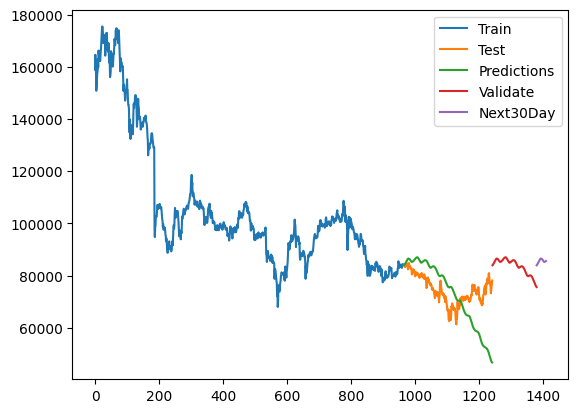

In [19]:
# 9.Vẽ hình
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()